In [80]:
import os
import numpy as np
from PIL import Image
from Backend.preprocess import detect_face
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Backend.preprocess import preprocess
import rembg



In [113]:
BASE_DIRECTORY = "AI Students Picture"
def process_data():
    image_data = []
    targets = []
    names = {}

    for i, folder in enumerate(os.listdir(BASE_DIRECTORY)):
        folder_path = os.path.join(BASE_DIRECTORY, folder)
        names[i] = folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            # print(f"Attempting to open: {image_path}")
            try:
                with Image.open(image_path) as img:
                    img_array = np.array(img)
                    face = detect_face(img_array)
                    # output_face = rembg.remove(face, bgcolor=(255, 255, 255, 0))
                    output_face = Image.fromarray(face)                    # out_face = output_face.convert('RGB')

                    output_image = output_face.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image)
                   

                    image_data.append(output_array)
                    targets.append(i)
            except Exception as e:
                print(f"Error opening {image_path}: {e}")
    print(image_data)
    image_data = np.array(image_data)
    print(image_data.shape)
    targets = np.array(targets)
    print(names)
    train_data, test_data, train_label, test_label = [], [], [], []

    for person in range(51):
        person_indices = np.where(targets == person)[0]
        train_indices = person_indices[3: 11]
        test_indices = person_indices[:3]
        train_data.extend(image_data[train_indices])
        train_label.extend(targets[train_indices])
        test_data.extend(image_data[test_indices])
        test_label.extend(targets[test_indices])
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    test_data = np.array(test_data)
    test_label = np.array(test_label)
    
    return train_data, train_label, test_data, test_label, names

train_data, train_label, test_data, test_label, names = process_data()
print(names)

print("Training Data set", train_data,"\n, Training Labels", train_label)

print("Testing Data set", test_data, "\n, Testing Labels", test_label)


returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in de

The Data set is now divided into Training data set and  Testing Data set with their corresponding label or class.

In [114]:
def EuclideanDistance(p, q):
        p = np.asarray(p).flatten()
        q = np.asarray(q).flatten()
        return np.sqrt(np.sum(np.power((p - q), 2)))

In [115]:
  
def project( W, train_data, mu = None):
        if mu is None:
            return np.dot(train_data, W)
        return np.dot(train_data - mu, W)
    
def reconstruct( W, Y, mu = None):
        if mu is None:
            return np.dot(Y, W.T)
        return np.dot(Y, W.T) + mu
    
def pca( train_data, train_label, num_components = 0):
        [n, d] = train_data.shape

        if (num_components <= 0) or (num_components > n):
            num_components = n
        
        mu = train_data.mean(axis = 0)
        train_data = train_data - mu

        if n > d:
             C= np.dot(train_data.T, train_data)
             [eigenvalues, eigenvectors] = np.linalg.eigh(C)
        else:
            C = np.dot(train_data, train_data.T)
            [eigenvalues, eigenvectors] = np.linalg.eigh(C)
            eigenvectors = np.dot(train_data.T, eigenvectors)

            for i in range(n):
                eigenvectors[:, i] = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i])
            
        idx = np.argsort(-eigenvalues)
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        eigenvalues = eigenvalues[0: num_components].copy()
        eigenvectors = eigenvectors[:, 0: num_components].copy()

        return [eigenvalues, eigenvectors, mu]
    
def lda( train_data, train_label, num_components = 0):
        [n,d] = train_data.shape

        c = np.unique(train_label)

        if (num_components <= 0) or (num_components > (len(c) - 1)):
            num_components = len(c) - 1
        
        meanTotal = train_data.mean(axis = 0)

        Sw = np.zeros((d, d), dtype = np.float32)
        Sb = np.zeros((d, d), dtype = np.float32)

        for i in c:
            train_datai = train_data[np.where(train_label == i)[0], :]
            meanClass = train_datai.mean(axis = 0)
            Sw = Sw + np.dot((train_datai - meanClass).T, (train_datai - meanClass))
            Sb = Sb + n * np.dot((meanClass - meanTotal), (meanClass - meanTotal).T)

        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(Sw) * Sb)
        idx = np.argsort(-eigenvalues.real)

        eigenvalues, eigenvectors = eigenvalues[idx], eigenvectors[:, idx]

        eigenvalues = np.array(
            eigenvalues[0: num_components].real, dtype = np.float32, copy = True
        )

        eigenvectors = np.array(
            eigenvectors[0:, 0:num_components].real, dtype = np.float32, copy = True
        )

        return [eigenvalues, eigenvectors]
    
def fisherfaces( train_data,train_label, num_components = 0):

        n = train_data.shape[0]

        c = len(np.unique(train_label))
        [eigenvalues_pca, eigenvectors_pca, mu_pca] = pca(train_data, train_label, n - c)

        [eigenvalues_lda, eigenvectors_lda] = lda(project(eigenvectors_pca, train_data, mu_pca), train_label, num_components)

        eigenvectors = np.dot(eigenvectors_pca, eigenvectors_lda)

        return [eigenvalues_lda, eigenvectors, mu_pca]
    
def create_font( fontname = "Arial", fontsize = 10):
        return {"fontname": fontname, "fontsize": fontsize}
    
def normalize( x, low, high, dtype = None):
        minx, marx = np.min(x), np.max(x)

        x = x - float(minx)
        x = x / float((marx - minx))
        x = x * (high - low)
        x = x + low

        if dtype is None:
            return np.asarray(x)
        return np.asarray(x, dtype = None)
    
def asRowMatrix( X):
        if len(X) == 0:
            return np.array([])
        mat = np.empty((0,X[0].size), dtype = X[0].dtype)

        for row in X:
            mat = np.vstack((mat, np.asarray(row).reshape(1, -1)))
        
        return mat
def subplot(
            title,
            images,
            rows,
            cols,
            sptitle = "subplot",
            sptitles = [], 
            colormap = cm.gray,
            ticks_visible = True,
            filename = None
    ):
        fig = plt.figure()
        fig.text(0.5, 0.95,title, horizontalalignment = "center")
        
        for i in range(len(images)):
            ax0 = fig.add_subplot(rows, cols, (i + 1))
            plt.setp(ax0.get_xticklabels(), visible = False)
            plt.setp(ax0.get_yticklabels(), visible = False)

            if len(sptitles) == len(images):
                plt.title(
                    "%s #%s" % (sptitle, str(sptitles[i])),
                    create_font("Tahoma", 10),
                ) 
            else:
                plt.title("%s #%d" % (sptitle, (i + 1)), create_font("Tahoma",10))
            plt.imshow(np.asarray(images[i]), cmap = colormap)
        
        if filename is None:
            plt.show()
        
        else:
            fig.savefig(filename)
                   

The reconstructed images are as Follow.

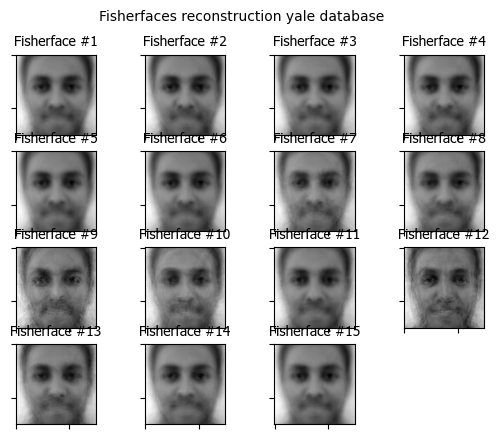

In [116]:
[D, W, mu] = fisherfaces(asRowMatrix(train_data), train_label)

E = []

for i in range(min(W.shape[1], 15)):
    e = W[:, i].reshape(-1, 1)
    p = project(e, train_data[0].reshape(1, -1), mu)
    R = reconstruct(e, p, mu)
    R = R.reshape(train_data[0].shape)
    E.append(normalize(R, 0, 255))

subplot(
    title = "Fisherfaces reconstruction yale database",
    images = E,
    rows = 4,
    cols = 4,
    sptitle = "Fisherface",
    colormap = cm.gray,
)




# # On the source machine


# with h5py.File('model.h5', 'w') as file:
#     file.create_dataset('D', data=D)
#     file.create_dataset('W', data=W)
#     file.create_dataset('mu', data = mu)
#     file.create_dataset('train_label', data = train_label)
    # file.create_dataset('names', data = np.string_(names))

# On the destination machine
# print(mu.shape,"original")
# with h5py.File("model.h5", "r") as file:
#             Dz = file["D"][:]
#             Wz = file["W"][:]
#             muz = file["mu"][:]
#             train_labelz = file["train_label"][:]
            

# print(muz.shape == mu.shape)
# print(D == Dz)
# print(Wz == W)
# print(train_labelz == train_label)

Now We can proceed to predicting function.

In [117]:
def compute(X, y):
    projections = []
    data_matrix = []
    [D, W, mu]  = fisherfaces(asRowMatrix(X), y, num_components = 0)
    for xi in X:
        projections.append(project(W, xi.reshape(1, -1), mu))
        data_matrix.append(xi)
    return projections, data_matrix

def predict(test_data):
    projections, data = compute(train_data, train_label)
    # print("here is the projections", projections)
    
    minDist = np.finfo("float").max
    minClass = -1
    projected = []

    Q = project(W, test_data.reshape(1, -1), mu)
    # res = []
    for i in range(len(projections)):
        dist = EuclideanDistance(projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = train_label[i]
            projected = projections[i]
            # res = data[i]
    reconstructed = reconstruct(W, projected, mu)
    return names[minClass], reconstructed

projection, data_matrix = compute(train_data, train_label)
# print(projection)
# print("======================================:")
# print(data_matrix)

# with h5py.File('model.h5', 'w') as file:
#     file.create_dataset('D', data=D)
#     file.create_dataset('W', data=W)
#     file.create_dataset('mu', data = mu)
#     file.create_dataset('train_label', data = train_label)
#     file.create_dataset('projection', data = projection)



<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=560x500 at 0x1D00E92C430> check


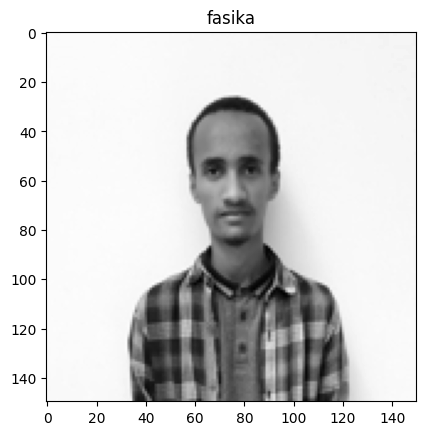

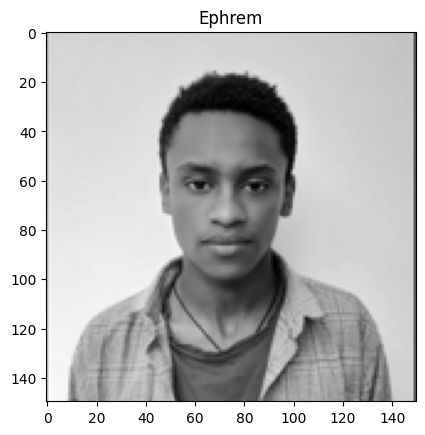

In [118]:
test_arr = []
import rembg
import numpy as np 
from PIL import Image


# input_image = np.array(input_image)
# output_image = rembg.remove(input_image, bgcolor=(255, 255, 255, 0))
# output_image = Image.fromarray(output_image)
# output_image = output_image.convert('RGB')

with Image.open("fasika.jpg") as img:
                    print(img, "check")
                    # img_array = preprocess(img)
                    img_array = np.array(img)

                    
                    # face = detect_face(img_array)
                    # output_face = rembg.remove(face, bgcolor=(255, 255, 255, 0))
                    output_face = Image.fromarray(img_array)
                    # out_face = output_face.convert('RGB')

                    output_image = output_face.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image)
                    test_arr.append(output_array)


                    plt.imshow(output_array, cmap='gray')  # 'gray' colormap for grayscale images
                    plt.title("fasika")
                    plt.show()
with Image.open("ephi.jpg") as img:
                    img_array = np.array(img)

                    
                    # face = detect_face(img_array)
                    output_image = Image.fromarray(img_array)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)
with Image.open("2.jpg") as img:
                    img_array = np.array(img)

                    # face = detect_face(img_array)
                    output_image = Image.fromarray(img_array)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)


                    plt.imshow(output_array, cmap='gray')  # 'gray' colormap for grayscale images
                    plt.title("Ephrem")
                    plt.show()
with Image.open("derb.jpg") as img:
                    img_array = np.array(img)

                    
                    # face = detect_face(img_array)
                    output_image = Image.fromarray(img_array)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)
with Image.open("4.jpg") as img:
                    img_array = np.array(img)
                    # face = detect_face(img_array)
                    output_image = Image.fromarray(img_array)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)
with Image.open("3.jpg") as img:
                    img_array = np.array(img)
                    # face = detect_face(img_array)
                    output_image = Image.fromarray(img_array)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_arr.append(output_array)


In [101]:
# E = []
# for index, test in enumerate(test_arr):
#     a = predict(test_arr[index])
#     # print(data)
#     # plt.imshow(data, cmap='gray')  # 'gray' colormap for grayscale images
#     # plt.title(names[a])
#     # plt.show()
#     print(names[a])
#     # print("Expected = ", test_label[index], " /predicted = ", predict(test_data[index]))

# subplot(
#     title = "Fisherfaces reconstruction yale database",
#     images = E,
#     rows = 4,
#     cols = 4,
#     sptitle = "Fisherface",
#     colormap = cm.gray,
# )

Here we will predict the labels for the test data and calculate the performance of fisherface.

In [44]:
corrects = 0
total = 0
for index, test in enumerate(test_data):
    total += 1
    # print(test_data[index].shape, "test data shape")
    if test_label[index] == predict(test_data[index])[0]:
        corrects += 1
    print("Expected = ", test_label[index], " /predicted = ", predict(test_data[index])[0])
    


print(f"The algorithm's accuracy is {(corrects / total) * 100}%")

Expected =  0  /predicted =  5
Expected =  0  /predicted =  4
Expected =  0  /predicted =  4
Expected =  1  /predicted =  1


KeyboardInterrupt: 

In [120]:
BASE_DIRECTORY = "A TEST SET"
def process_data_2():
    test_data = []
    targets = []
    names = {}

    for i, folder in enumerate(os.listdir(BASE_DIRECTORY)):
        folder_path = os.path.join(BASE_DIRECTORY, folder)
        names[i] = folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            # print(f"Attempting to open: {image_path}")
            try:
               with Image.open(image_path) as img:
                    img_array = np.array(img)

                    
                    face = detect_face(img_array)
                    output_image = Image.fromarray(face)
                    output_image = output_image.resize((150, 150))
                    output_image = output_image.convert("L")
                    output_array = np.array(output_image) 
                    test_data.append(output_array)
                    targets.append(i)
            except Exception as e:
                print(f"Error opening {image_path}: {e}")
    return test_data, targets, names    

check_data, label, nami = process_data_2()

check_data = np.array(check_data)
label = np.array(label)


returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection
returning none in detection


[ 0  1  2  2  3  3  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 13 14
 14 15 17 18 18 19 20 20 21 21 22 22 23 23 24 24 25 25 26 27 27 28 28 29
 30 30 31 31 32 32]
Expected =  Abraham Wendmeneh  /predicted =  Metsakal Zeleke


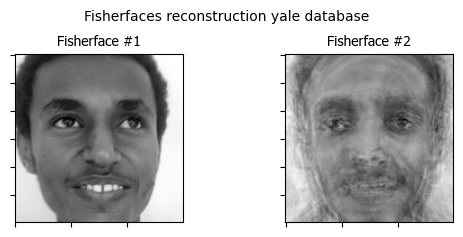

Expected =  Amanuel Beyene  /predicted =  Tiruzer Tsedeke


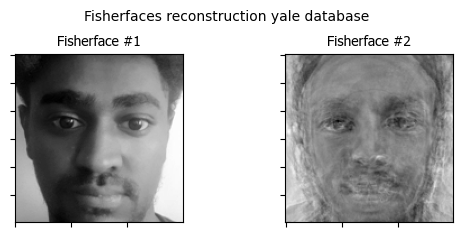

Expected =  Amir Ahmedin  /predicted =  Metsakal Zeleke


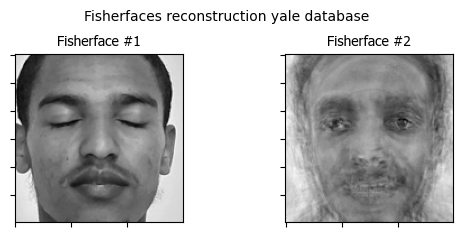

Expected =  Amir Ahmedin  /predicted =  Yosef Muluneh


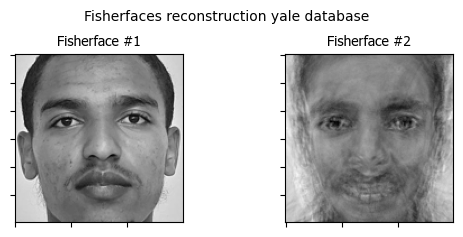

Expected =  Betelhem Yimam  /predicted =  Betelhem Yimam


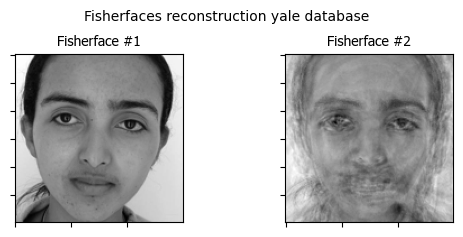

Expected =  Betelhem Yimam  /predicted =  Betelhem Yimam


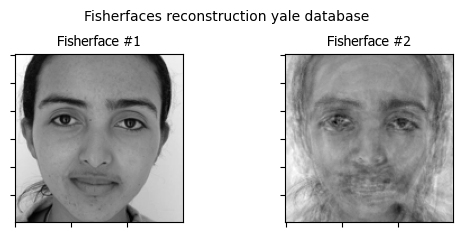

Expected =  Biniyam Haile  /predicted =  Biniyam Haile


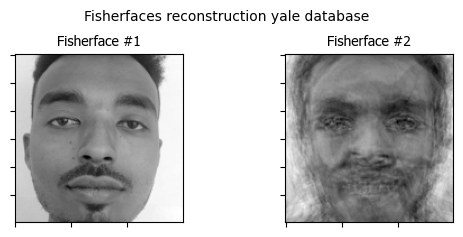

Expected =  Dagmawi_Tensay  /predicted =  Biniyam Haile


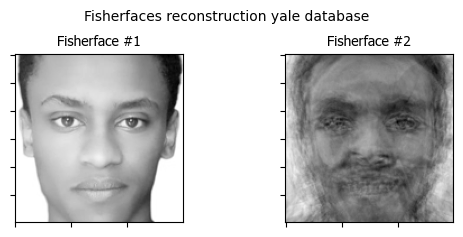

Expected =  Dagmawi_Tensay  /predicted =  Biniyam Haile


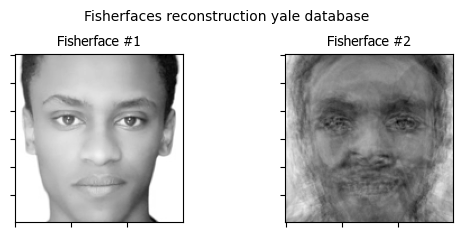

Expected =  Dawit Getahun  /predicted =  Sahib Semahegn


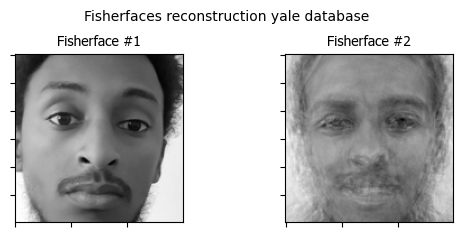

Expected =  Dawit Getahun  /predicted =  Sahib Semahegn


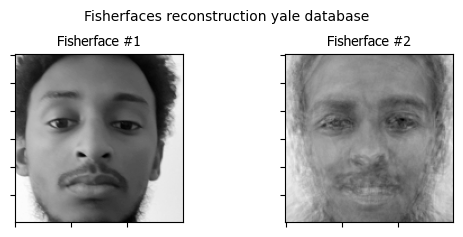

Expected =  Derbew_shimels  /predicted =  Deribew_Shimels


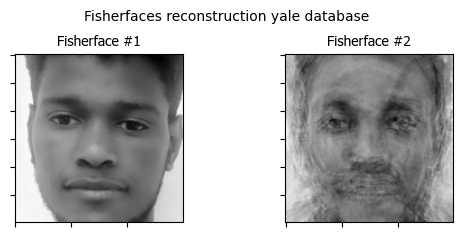

Expected =  Derbew_shimels  /predicted =  Deribew_Shimels


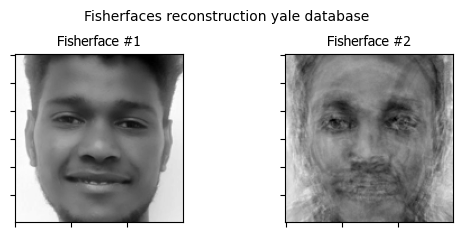

Expected =  Ephrem_shimels  /predicted =  Ephrem_Shimels


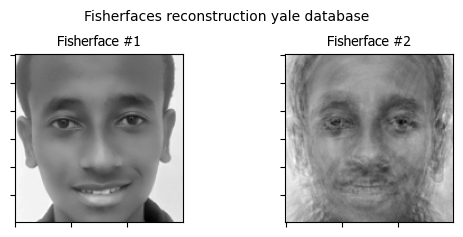

Expected =  Ephrem_shimels  /predicted =  Ephrem_Shimels


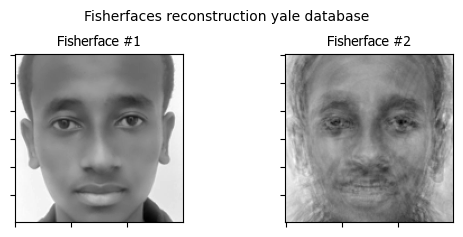

Expected =  Esayas Nigussie  /predicted =  Esayas Nigussie


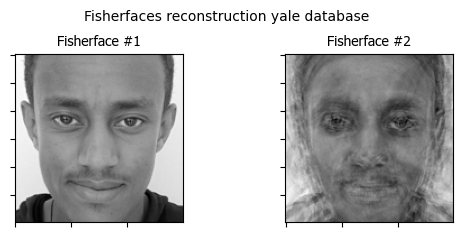

Expected =  Esayas Nigussie  /predicted =  Esayas Nigussie


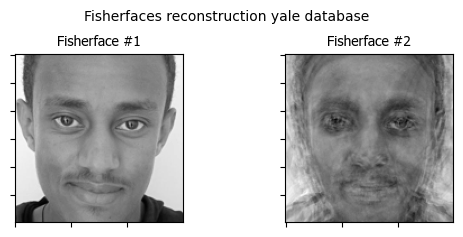

Expected =  Etsubdink Awoke  /predicted =  Etsubdink Awoke


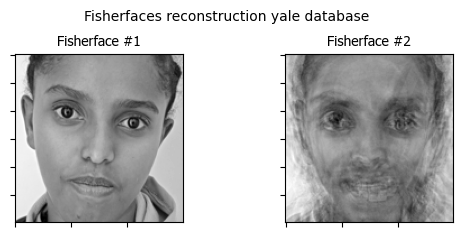

Expected =  Etsubdink Awoke  /predicted =  Etsubdink Awoke


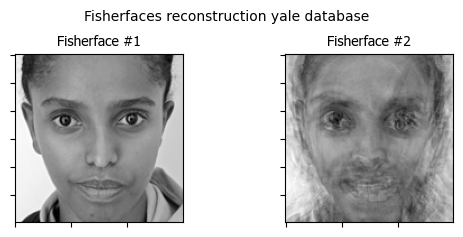

Expected =  Fasika_Fikadu  /predicted =  Fasika_Fikadu


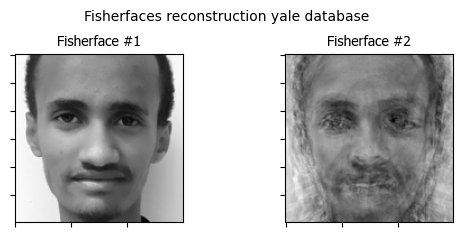

Expected =  Fasika_Fikadu  /predicted =  Fasika_Fikadu


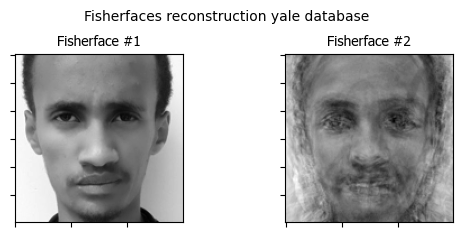

Expected =  Fraol Mulugeta  /predicted =  Yosef Muluneh


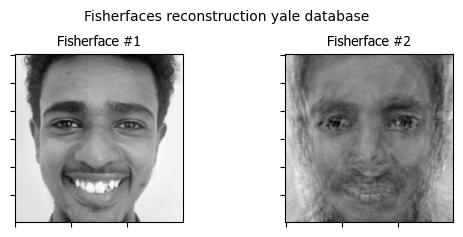

Expected =  Gedion Ezra  /predicted =  Yosef Muluneh


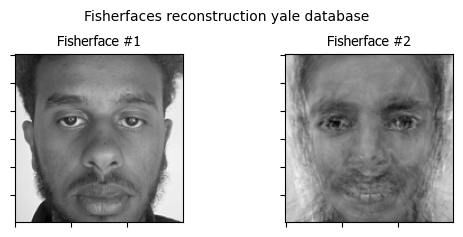

Expected =  Geleta Daba  /predicted =  Geleta Daba


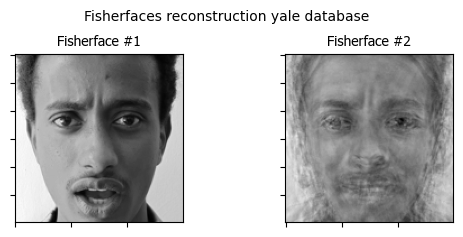

Expected =  Geleta Daba  /predicted =  Geleta Daba


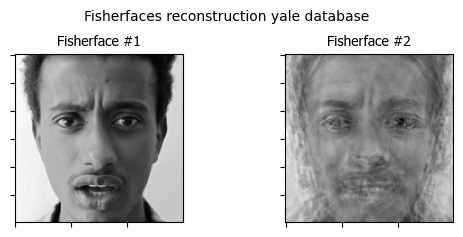

Expected =  Gelila Moges  /predicted =  Biniyam Haile


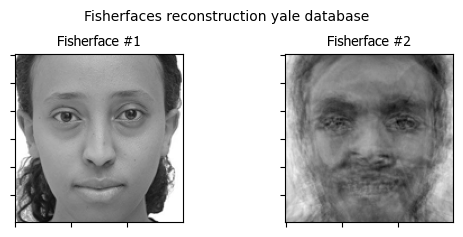

Expected =  Kidus Hunegnaw  /predicted =  Kidus Hunegnaw


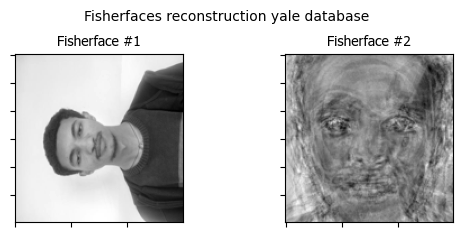

Expected =  Mariam Yohannes  /predicted =  Mariam Yohannes


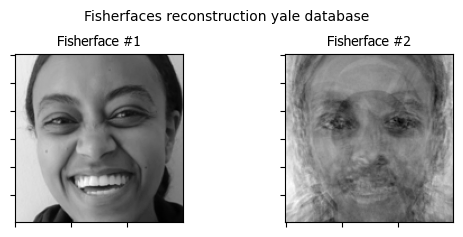

Expected =  Mariam Yohannes  /predicted =  Mariam Yohannes


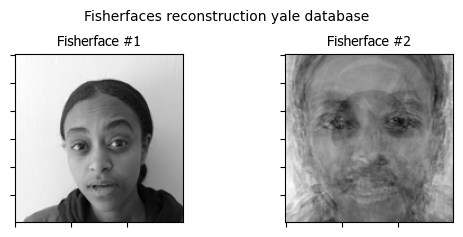

Expected =  Melkishi Tesfaye  /predicted =  Yosef Muluneh


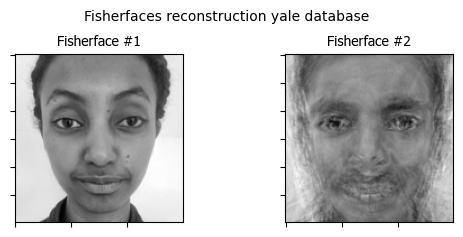

Expected =  Metsakal Zeleke  /predicted =  Sahib Semahegn


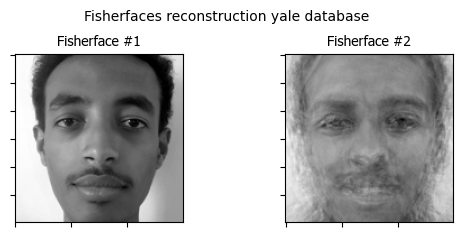

Expected =  Metsakal Zeleke  /predicted =  Milion Tolesa


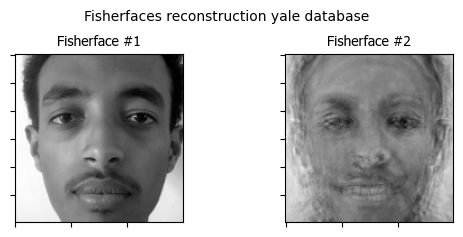

Expected =  Milion Tolesa  /predicted =  Nathnael Dereje


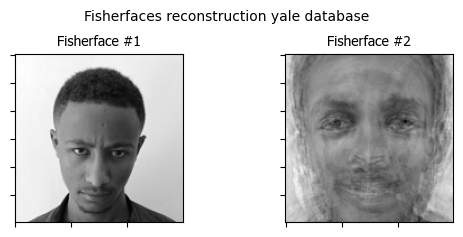

Expected =  Milion Tolesa  /predicted =  Abraham Wendmeneh


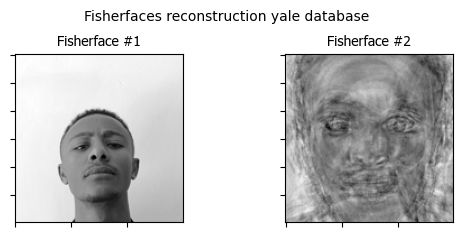

Expected =  Naol Taye  /predicted =  Abraham Wendmeneh


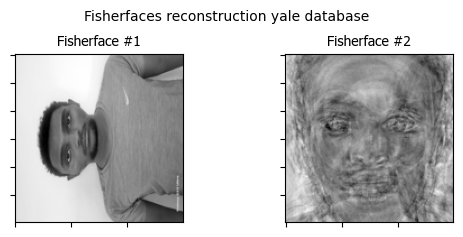

Expected =  Naol Taye  /predicted =  Abraham Wendmeneh


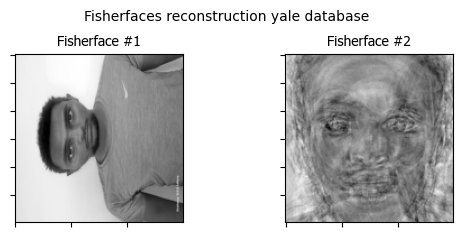

Expected =  Olyad Temesgen  /predicted =  Olyad Temesgen


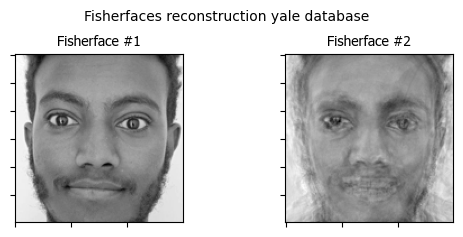

Expected =  Olyad Temesgen  /predicted =  Olyad Temesgen


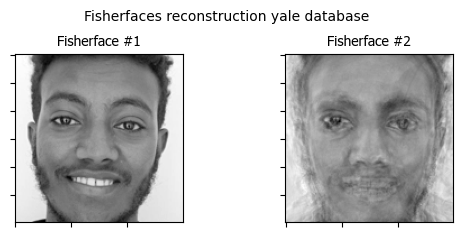

Expected =  Sahib Semahegn  /predicted =  Sahib Semahegn


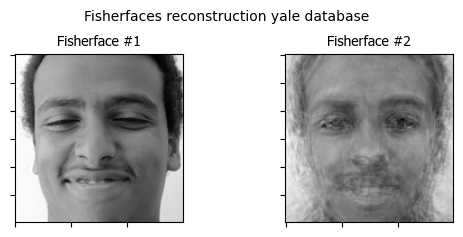

Expected =  Sahib Semahegn  /predicted =  Sahib Semahegn


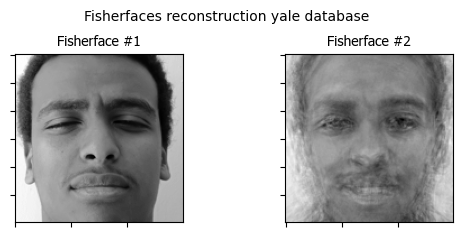

Expected =  Shemsu Nurye  /predicted =  Yanet Mekuria


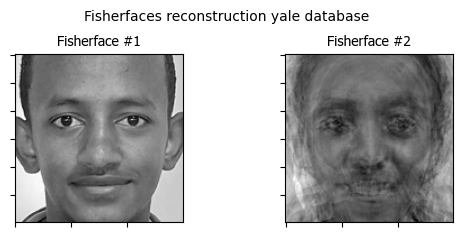

Expected =  Shemsu Nurye  /predicted =  Yosef Muluneh


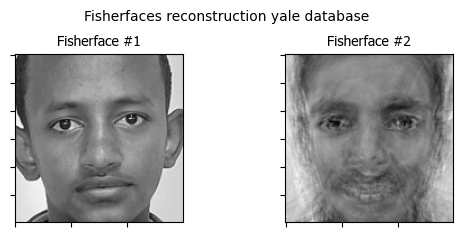

Expected =  Sosina Esayas  /predicted =  Dawit Getahun


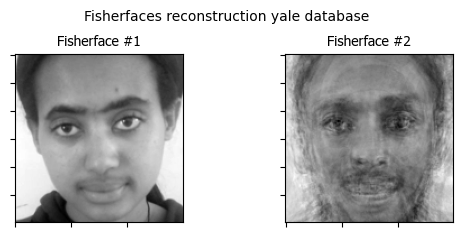

Expected =  Tewodros Berhanu  /predicted =  Leul Wujira


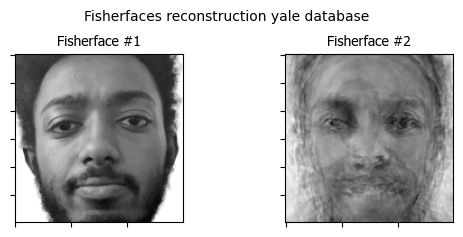

Expected =  Tewodros Berhanu  /predicted =  Leul Wujira


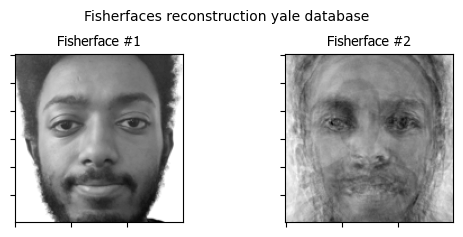

Expected =  Tinsae Shemelaise  /predicted =  Milion Tolesa


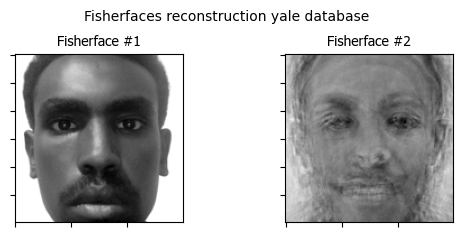

Expected =  Tinsae Shemelaise  /predicted =  Nathnael Dereje


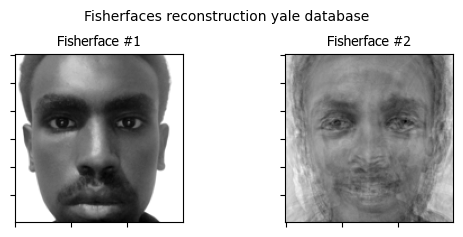

Expected =  Yanet Mekuria  /predicted =  Feven Tesfaye


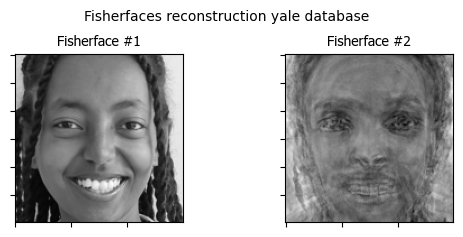

Expected =  Yohannes Dessie  /predicted =  Amanuel Beyene


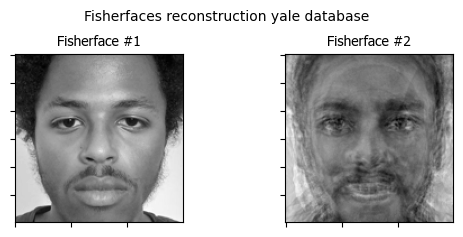

Expected =  Yohannes Dessie  /predicted =  Yohannes Dessie


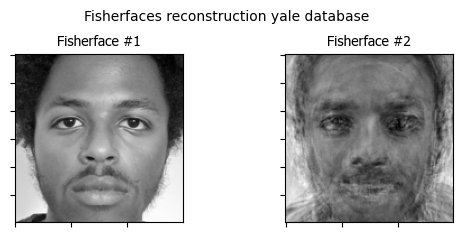

Expected =  Yonas Engedu  /predicted =  Husen Yusuf


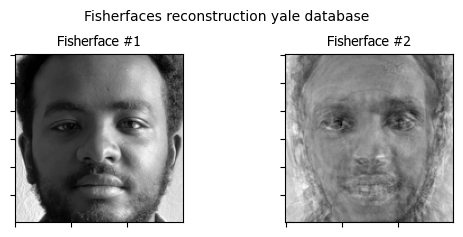

Expected =  Yonas Engedu  /predicted =  Tiruzer Tsedeke


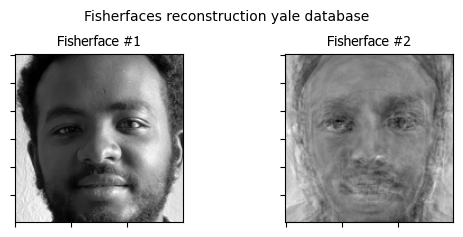

Expected =  Yosef Muluneh  /predicted =  Yosef Muluneh


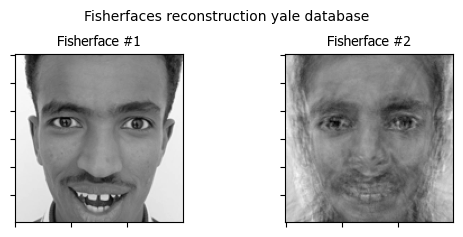

Expected =  Yosef Muluneh  /predicted =  Yosef Muluneh


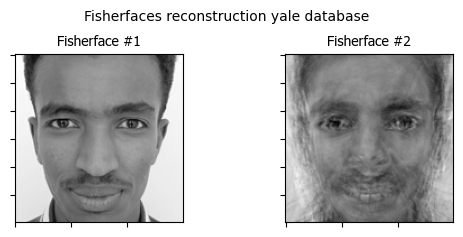

The algorithm's accuracy is 38.88888888888889%


In [121]:
print(label)
corrects = 0
total = 0
for i in range(len(check_data)):
    total += 1
    # print(test_data[index].shape, "test data shape")
    if nami[label[i]] == predict(check_data[i])[0]:
        corrects += 1
    print("Expected = ", nami[label[i]], " /predicted = ", predict(check_data[i])[0])
    # reconstructed = reconstruct(W, predict(test)[1], mu)
    E = [check_data[i].reshape(150, 150), predict(check_data[i])[1].reshape(150, 150)]
    subplot(
    title = "Fisherfaces reconstruction yale database",
    images = E,
    rows = 2,
    cols = 2,
    sptitle = "Fisherface",
    colormap = cm.gray,
)





print(f"The algorithm's accuracy is {(corrects / total) * 100}%")